In [12]:
#importing libraries
import easyocr
import cv2
import goslate
from PIL import Image 
import numpy as np
img_path='poster.jpeg'

In [13]:
#increasing contrast and decreasing brightness
#this highly improves the accuracy of the OCR
im=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
im=im*1.5-70
cv2.imwrite('poster_contrast.jpeg',im)
img_const = 'poster_contrast.jpeg'

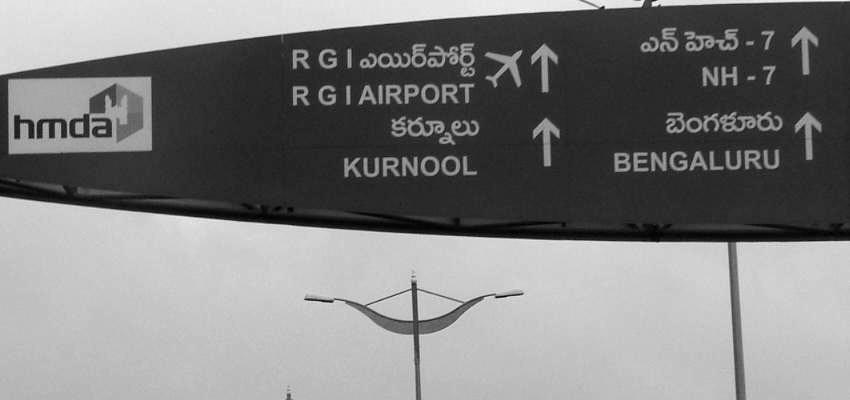

In [14]:
#resizing the image to 300X300
#resizing makes the images to the sufficient size to increase the efficiency of the EasyOCR
img = Image.open(img_const)
img.save("poster_resize.jpeg", "JPEG",dpi=(300,300))
img_resize = "poster_resize.jpeg"
Image.open(img_resize)

In [15]:
#using easyOcr to read the imgage for text in telugu and english language
reader = easyocr.Reader(['en','te'],gpu=True)
bounds = reader.readtext(img_path)
bounds

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[635, 20], [779, 20], [779, 59], [635, 59]],
  'ఎన్హెచ్-7',
  0.2709723630130462),
 ([[288, 46], [358, 46], [358, 74], [288, 74]], 'R61', 0.3558547794818878),
 ([[353, 37], [565, 37], [565, 101], [353, 101]],
  'ఎయిరిపోర్ట్ 71',
  0.4524674742163174),
 ([[698, 62], [780, 62], [780, 92], [698, 92]], 'NH్ -7', 0.4577416156424916),
 ([[287, 76], [481, 76], [481, 113], [287, 113]],
  'RGIAIRPORT',
  0.7895266670982034),
 ([[9, 109], [117, 109], [117, 145], [9, 145]], 'hmda', 0.9603914618492126),
 ([[383, 108], [488, 108], [488, 153], [383, 153]],
  'కర్నూలు',
  0.9620498793711006),
 ([[662, 108], [790, 108], [790, 138], [662, 138]],
  'బెంగరూరు',
  0.8098359992420154),
 ([[338, 149], [481, 149], [481, 185], [338, 185]],
  'KURNOOL',
  0.5688993020081449),
 ([[608, 142], [787, 142], [787, 180], [608, 180]],
  'BENGALURU',
  0.9172547184057178)]

In [16]:
#taking the position of each text and also the text
no_of_bounds=len(bounds)
#simple font to rewrite the text in english
font=cv2.FONT_HERSHEY_SIMPLEX

EnH-7.
R61
Airport 71.
Nh h -7.
RGIAIRPORT
HMDA
Kurnool
Bengalu
KURNOOL
BENGALURU


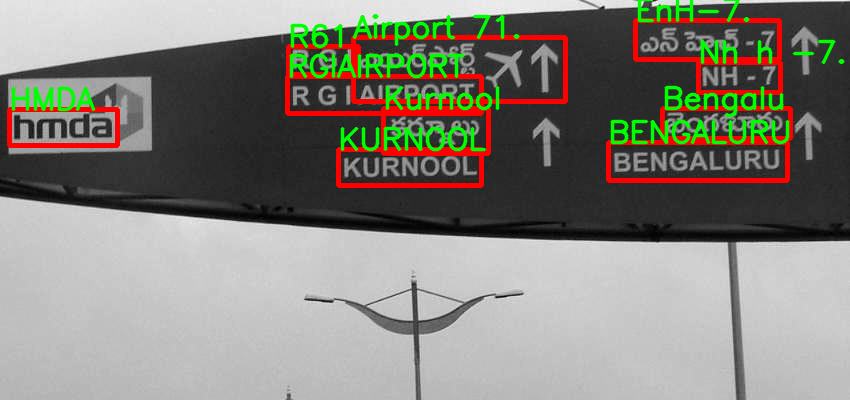

In [19]:
#Taking the resized image and positioning boxes around text with the translated Text abouve it
translator = goslate.Goslate()

img=cv2.imread(img_resize)
for i in range(no_of_bounds):
    result=bounds[i]
    top_left_x=int(result[0][0][0])
    top_left_y=int(result[0][0][1])
    top_right_x=int(result[0][1][0])
    top_right_y=int(result[0][1][1])
    bottom_right_x=int(result[0][2][0])
    bottom_right_y=int(result[0][2][1])
    text=str(result[1])
    result1=translator.translate(text,target_language='en')
    print(result1)
    img=cv2.rectangle(img,(top_left_x,top_left_y),(bottom_right_x,bottom_right_y),(255,0,0),3)
    img=cv2.putText(img,result1,(top_left_x,top_left_y),font,1,(0,255,0),2,cv2.LINE_AA)
    

img = Image.fromarray(img, 'RGB')
img.save('poster_final.jpeg')
display(img)